In [289]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
 
# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# to make this notebook's output stable across runs
np.random.seed(42)
 
# To plot pretty figures
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Preprocess

In [290]:
PATH_TO_DATA = r"C:\Users\Reza\quality_test.csv"
df= pd.read_csv(PATH_TO_DATA,header=None)
Data=df.values
x1=Data[:,0].reshape(-1,1)
n=Data.shape[0]
x2=Data[:,1].reshape(-1,1)
y=Data[:,2].reshape(-1,1)


# Defining the function
def Fx(x1,x2):
    fX=np.concatenate((x1,x2,x1*x1,x1*x2,x2*x2,x1*x1*x1,x1*x1*x2,x1*x2*x2,x2*x2*x2,x1*x1*x1*x1,x1*x1*x1*x2,x1*x1*x2*x2,x1*x2*x2*x2,x2*x2*x2*x2,x1*x1*x1*x1*x1,x1*x1*x1*x1*x2,x1*x1*x1*x2*x2,x1*x1*x2*x2*x2,x1*x2*x2*x2*x2,x2*x2*x2*x2*x2,x1*x1*x1*x1*x1*x1,x1*x1*x1*x1*x1*x2,x1*x1*x1*x1*x2*x2,x1*x1*x1*x2*x2*x2,x1*x1*x2*x2*x2*x2,x1*x2*x2*x2*x2*x2,x2*x2*x2*x2*x2*x2,x1*x1*x1*x1*x1*x1*x1,x1*x1*x1*x1*x1*x1*x2,x1*x1*x1*x1*x1*x2*x2,x1*x1*x1*x1*x2*x2*x2,x1*x1*x1*x2*x2*x2*x2,x1*x1*x2*x2*x2*x2*x2,x1*x2*x2*x2*x2*x2*x2,x2*x2*x2*x2*x2*x2*x2), axis=1)
    return fX
fX=Fx(x1,x2)
fX

array([[ 5.12670000e-02,  6.99560000e-01,  2.62830529e-03, ...,
         4.40352691e-04,  6.00879959e-03,  8.19926237e-02],
       [-9.27420000e-02,  6.84940000e-01,  8.60107856e-03, ...,
         1.29662850e-03, -9.57616530e-03,  7.07241450e-02],
       [-2.13710000e-01,  6.92250000e-01,  4.56719641e-02, ...,
         7.26046625e-03, -2.35181216e-02,  7.61799619e-02],
       ...,
       [-4.84450000e-01,  9.99270000e-01,  2.34691802e-01, ...,
         2.33836427e-01, -4.82331978e-01,  9.94901177e-01],
       [-6.33640000e-03,  9.99270000e-01,  4.01499650e-05, ...,
         4.00036314e-05, -6.30869717e-03,  9.94901177e-01],
       [ 6.32650000e-01, -3.06120000e-02,  4.00246023e-01, ...,
        -1.07593379e-08,  5.20611480e-10, -2.51907984e-11]])

In [291]:
#Normalising The data
xScaler = MinMaxScaler().fit(fX);        #This has changed
X = xScaler.transform(fX)

# Logistic Regression

In [292]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X, y.ravel())

In [293]:
y_pred = clf.predict(X)
weight = clf.coef_ 
## Getting the Weights and bias in logistic Regression
weight

array([[ 0.66021225,  1.27313601, -1.70424824, -0.8375114 , -1.179952  ,
         0.1363854 ,  0.08281342, -0.19892954, -0.05974832, -1.23533471,
        -0.06879853, -0.97460106, -0.24884005, -1.04634876, -0.17559794,
        -0.09784644,  0.06836711, -0.22320867, -0.26995916, -0.41212846,
        -0.8455278 ,  0.0711784 , -0.82899775,  0.0668097 , -0.72653501,
        -0.12490843, -0.79757329, -0.27448561, -0.10480687, -0.02362927,
        -0.23372   , -0.02356339, -0.28098039, -0.17746705, -0.47035075]])

In [294]:
from sklearn.metrics import accuracy_score
print("The accuracy of model is {0:0.2f}".format(accuracy_score(y, y_pred)))

The accuracy of model is 0.81


#  Final Plot


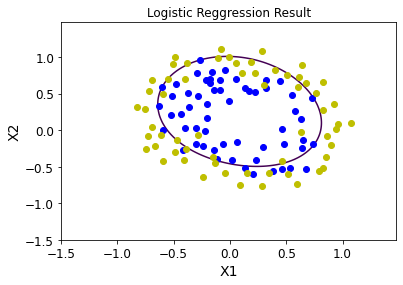

The accuracy of model is 0.81


In [295]:
for i in range (len(y_pred)):
    if y[i]==1:
        plt.plot(x1[i],x2[i],'bo')
    else:
        plt.plot(x1[i],x2[i], 'yo')
        
delta = 0.025
xrange = np.arange(-1.5, 1.5, delta)
yrange = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(xrange,yrange)
## Estimation by its first 15 Weights
F=0.66*X+1.27*Y-1.74*X**2-0.84*X*Y-1.18*Y**2+0.13*(X**3)+0.08*X*X*Y-0.2*X*Y*Y-0.06*Y**3-1.23*X**4-0.07*X*X*X*Y-0.97*X*X*Y*Y+0.25*X*Y*Y*Y-1.05*Y**2+1.05
plt.contour(X, Y, F, [0])
plt.title("Logistic Reggression Result")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()   
print("The accuracy of model is {0:0.2f}".format(accuracy_score(y, y_pred)))